# <center><h3><b>ANALYSIS OF ENVIRONMENTAL FACTORS FOR PREDICTING WATER QUALITY</b></h3></center>
<center><b>Sushma Hallikere Hundi Shambhu, </b>    
    Registration Number: <b><i>2310545 </b></i>, 
    Email: <b><i>sh23833@essex.ac.uk </b></i>
    </center>

<h2 align="center"><b>INTRODUCTION</b></h2>

Analysis of environmental factors for predicting water quality is an essential component of environmental health, with significant implications for ecosystems, human well-being, and the economy. There is an increasing need for efficient methods to monitor and forecast water quality levels as environmental concerns and freshwater demand both increase. Integrated analysis, which combines data from multiple environmental factors, provides a complete approach to evaluating and projecting water quality. To measure the health of a water body, the integrated analysis focuses on elements such as chemical composition, physical characteristics, land use, weather, socioeconomics, and waste management. Dataset features include water quality measurements, land use patterns, socioeconomic aspects, and waste composition. This approach helps to assess pollution levels, habitat health, and resource management, allowing for the creation of predictive models for sustainable water management.

The use of integrated environmental component analysis to predict water quality levels has significant implications. The positive outcomes of this strategy are numerous, ranging from protecting aquatic ecosystems and public health to informing policy decisions and promoting sustainable development. By utilizing modern modeling approaches and interdisciplinary teamwork, we can obtain a better understanding of the intricate relationships between environmental factors and water quality. This understanding is critical for creating effective management methods that maintain a balance between human needs and environmental conservation goals.

Predictive models, such as Random Forest classifiers and Gradient Boosting Classifiers, which is then used to examine integrated datasets and estimate water quality levels. These models uses machine learning techniques to find patterns and correlations between environmental variables and water quality measures. Furthermore, constant monitoring and evaluation are required to validate model predictions and improve analysis over time. The accuracy and reliability of water quality predictions can be improved by repeatedly refining models and incorporating updated information. Integrated analysis ultimately provides stakeholders with useful information to enable them to make choices that support the sustainable management of water resources.


<h2 align="center"><b>PRELIMINARY ANALYSIS</b></h2>

The dataset is based on WaterBase water quality data provided by the European Environment Agency (EEA). It contains a variety of water quality-related features, including the category of the water body, observed attributes, sampling details, and mean values of monitored determinants. Furthermore, socioeconomic characteristics of countries, such as population density, tourism data, migration rates, literacy rates, and waste composition and treatment information, are given.  This comprehensive dataset is intended to enable integrated analysis of environmental factors impacting water quality levels.

## <b>IMPORTING LIBRARIES</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, f1_score
from geopy.geocoders import Nominatim
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

## <b>DATASET DESCRIPTION</b>

In [2]:
# The 'waterPollution.csv' dataset is loaded into a Pandas DataFrame.
data = pd.read_csv('waterPollution.csv')

The dataset includes a wide range of features, each of which provides unique insights into the dynamics of water quality. Important characteristics consist of;

<b> 1. Water Body Category: </b>
A classification code indicating the sort of water body being observed

<b> 2. Determinant Monitored: </b>
A unique code that represents the exact parameter or substance detected in the water sample

<b> 3. Analysed Fraction and Media:</b>
A description of the fraction and kind of sample examined during testing

<b> 4. Unit of Measure: </b>
The standard unit of measurement for reported values

<b> 5. Sample Timeframe: </b>
The amount of time that was used to gather and sample the data

<b> 6. Mean </b>
value is the average value produced from aggregated data

<b> 7. Water Body identification: </b>
A unique international identification for the water body from which data were taken

<b> 8. Social and Economic Metrics:- </b>

<b> Country: </b>
The data's geographical origin, as determined by coordinates

<b> Population Density: </b>
The density of people inside a country

<b> Terra Marine Protected Area: </b>
The average extent of protected marine areas between 2016 and 2018

<b> Tourist Count: </b>
Average tourist count from 1990 to 2020

<b> Net Migration: </b>
The average migration rate between 2011 and 2018

<b> Literacy Rate: </b>
The percentage of the population that was literate between 2010 and 2018

<b> GDP: </b>
Gross Domestic Product of a country

<b> 9. Environmental Components:- </b>

<b> Droughts, Floods, and Temperature: </b>
A composite indication of climatic conditions

<b> Composition of Waste: </b>
A percentage breakdown of the main waste components

<b> Waste Treatment and Recycling: </b>
The proportion of waste that is recycled by treatment centers

The Water Quality Dataset offered above offers a multidimensional view of water quality dynamics, incorporating socioeconomic, environmental, and geographic elements. This dataset, which draws on a variety of data sources and indicators, provides significant insights for policymakers, researchers, and stakeholders interested in environmental conservation and water resource management.

## <b>EXPLORATORY DATA ANALYSIS (EDA)</b>

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarise their key properties, which frequently uses statistical graphs and other data visualization techniques. The main basic purpose of EDA is to comprehend the data, discover patterns, and develop ideas that can help future studies or modeling. EDA often involves analyzing the distribution of variables, investigating their correlations, and evaluating the dataset's overall structure and quality. It is an important first step in the data analysis process, providing insights that will help with further data modeling and decision-making. Correlation analysis, spatial analysis, and summary statistics are used for EDA for the study.

<b>Data Loading and Initial Exploration:</b>

In [3]:
# Shows the first few rows of the dataset.
data.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [4]:
# Determine the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

In [5]:
# Check for the missing values.
data.isna()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Provides summary statistics for all the attributes.
data.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,...,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,...,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,...,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,...,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,...,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,...,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


<b>Correlation Analysis and Visualization:</b>

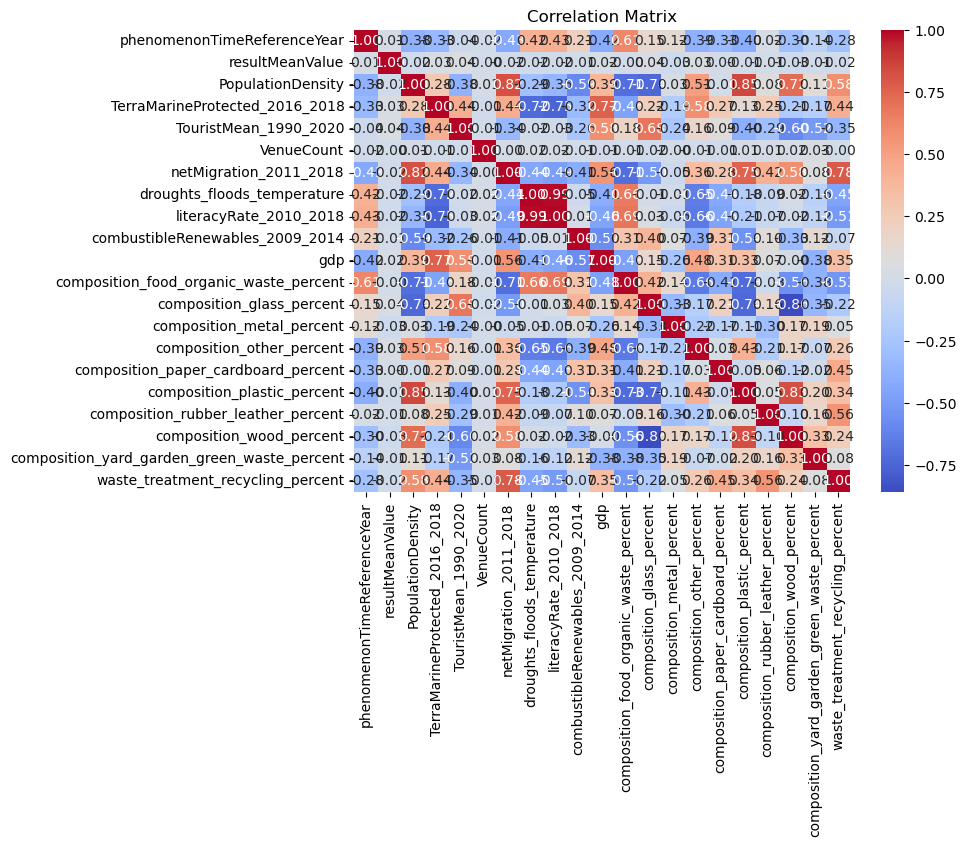

In [7]:
# Chooses numerical columns to be analyzed for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap depicts the correlations between numerical variables in the dataset. It focuses on analyzing correlations between quantitative variables by just using numerical columns. The heatmap shows correlation coefficients ranging from -1 to 1, with colors indicating the intensity and direction of the correlations. To find patterns, choose relevant characteristics for analysis, assess the quality of the data, and analyze the output of predictive models, this graphic is quite helpful. By evaluating the correlation matrix, we can determine which variables tend to move together, detect redundant features, and obtain insights into the underlying linkages in the data. Therefore, creating and analyzing the correlation matrix is critical for understanding the dataset's structure and directing subsequent analytical and modeling decisions.

<b>Geocoding and Spatial Visualization:</b>

In [8]:
# Initialization of geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode for a country
def geocode_country(country):
    try:
        # Perform geocoding
        location = geolocator.geocode(country)
        if location:
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Geocoding failed for country: {country}, Error: {e}")
    return None, None


# determine the unique country
countries = data['Country'].unique()

# Append geocode country to a list 
geocoded_data = []

for country in countries:
    latitude, longitude = geocode_country(country)
    geocoded_data.append({'Country': country, 'Latitude': latitude, 'Longitude': longitude})

geocoded_df = pd.DataFrame(geocoded_data)
print(geocoded_df)

           Country   Latitude  Longitude
0           France  46.603354   1.888334
1            Spain  39.326068  -4.837979
2   United Kingdom  54.702354  -3.276575
3        Lithuania  55.350000  23.750000
4         Portugal  39.662165  -8.135352
5          Austria  47.593970  14.124560
6         Bulgaria  42.607397  25.485662
7          Germany  51.163818  10.447831
8          Finland  63.246778  25.920916
9   Czech Republic  49.743905  15.338106
10         Belgium  50.640281   4.666715
11         Denmark  55.670249  10.333328
12             NaN  46.314475  11.048029
13           Italy  42.638426  12.674297
14         Ireland  52.865196  -7.979460
15          Sweden  59.674971  14.520858
16         Romania  45.985213  24.685923
17          Serbia  44.024323  21.076574
18        Slovakia  48.741152  19.452865
19     Netherlands  52.243498   5.634323
20          Poland  52.215933  19.134422
21      Luxembourg  49.611277   6.129799
22     Switzerland  46.798562   8.231974
23          Latv

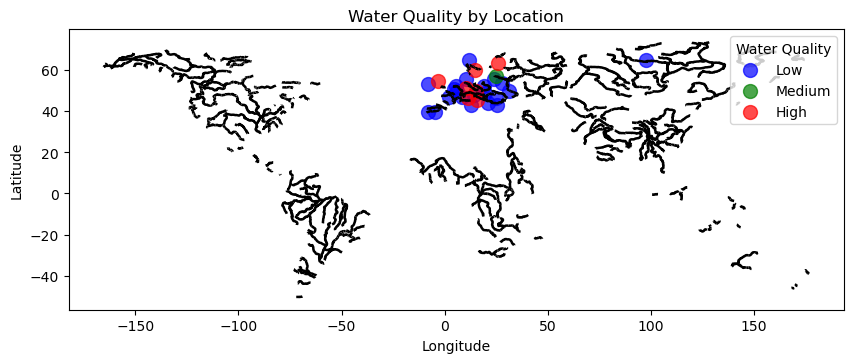

In [9]:
geocoded_df = pd.DataFrame(geocoded_df)
geocoded_df['resultMeanValue'] = data['resultMeanValue']

# Conversion of latitude and longitude to point geometry
geometry = gpd.points_from_xy(geocoded_df['Longitude'], geocoded_df['Latitude'])

gdf = gpd.GeoDataFrame(geocoded_df, geometry=geometry)

gdf['resultMeanValue'] = pd.to_numeric(gdf['resultMeanValue'], errors='coerce')

# Water quality levels based on 'resultMeanValue' is determined
low_threshold = 25
high_threshold = 75

def categorize_quality(value):
    if value < low_threshold:
        return 'Low'
    elif value < high_threshold:
        return 'Medium'
    else:
        return 'High'

gdf['QualityLevel'] = gdf['resultMeanValue'].apply(categorize_quality)

# Loading and plotting the shapefile
world = gpd.read_file('ne_50m_rivers_lake_centerlines.shp')
ax = world.plot(color='black', edgecolor='black', linewidth=1.8, figsize=(10, 8))
colors = {'Low': 'blue', 'Medium': 'green', 'High': 'red'}

# Ploting water quality by location
for level, color in colors.items():
    gdf[gdf['QualityLevel'] == level].plot(ax=ax, color=color, label=level, markersize=100, alpha=0.7)

plt.legend(title='Water Quality')

plt.title('Water Quality by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The study use geocoding to translate the names of countries into latitude and longitude coordinates so that water quality levels can be visualized spatially. The plot, which categorizes water quality data and overlays it on a map, provides insights into geographical water quality variances. This visualization helps to identify places with varying water quality ratings and explore spatial patterns. This is ultimately beneficial for making informed choices regarding the conservation of the environment and the management of water resources.

## <b>DATA PREPROCESSING</b>

Data preprocessing is the process of cleaning, converting, and improving the quality and structure of raw data before it is used for analysis or modeling. Preprocessing has an essential role in this project to guarantee feature engineering, data quality, and model compatibility, which in turn leads to improved model performance. Preprocessing facilitates accurate analysis and modeling, which improves insights and decision-making by eliminating constraints such as missing values, outliers, and incompatible data formats. 

<b>Data Cleansing: </b>

In [10]:
total_rows = data.shape[0]
print("Total rows in the dataset before data cleaning:", total_rows)

# eliminating empty row values across all attributes
data = data.dropna()
total_rows = data.shape[0]
print("Total rows in the dataset after data cleaning:", total_rows)

Total rows in the dataset before data cleaning: 20000
Total rows in the dataset after data cleaning: 19893


Removing rows with empty values ensures data integrity and increases analysis accuracy by removing incomplete data points, which improves model performance and reduces bias.

<b>Feature Selection:</b>

In [11]:
# Separate features and target variable
X = data.drop(["resultMeanValue"], axis=1)
y = data["resultMeanValue"]

<Axes: >

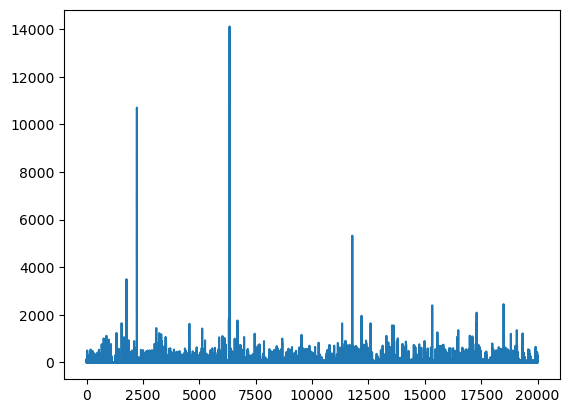

In [12]:
data["resultMeanValue"].plot()

Separating features (X) from the target variable (y) is an important step in supervised learning problems. By removing this variable ("resultMeanValue") from the feature set, we can identify the independent factors that will be utilized in predicting the desired outcome. This enables us to explore the correlation between the features and the target variable and develop predictive models based on that relationship. Plotting the target variable ("resultMeanValue") provides a graphical representation of its distribution, helping in understanding its properties and identifying potential trends or outliers, which is critical for model training and evaluation.

<b>Data Preprocessing:</b>

Converting the continuous target variable to categorical labels allows classification techniques to be used, making discrete class prediction more efficient. Identifying numeric and categorical columns aids in determining feature types for proper preprocessing. Imputing missing values for numeric characteristics with the mean ensures the dataset's completeness and data integrity, which is required for accurate analysis. Encoding categorical variables makes numerical representation possible, which is required by many machine learning algorithms to analyze categorical data efficiently. This makes comprehensive analysis and modeling feasible.

In [13]:
# Converting continuous target variables to categorical labels
threshold_value = 0.5  
y_categorical = pd.cut(y, bins=[-np.inf, threshold_value, np.inf], labels=[0, 1])

In [14]:
# Get numeric and categorical attribute
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [15]:
# Imputing missing values for numeric features with their mean
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())


In [16]:
# Encoding categorical variables numerical representation
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

<h2 align="center"><b>METHODOLOGY</b></h2>

<b>Model Selection & Training:</b>

The approach builds and trains a Random Forest Classifier with specific hyperparameters and Gradient Boosting Classifier models to predict water quality levels based on environmental features. The model's performance in classifying water quality is evaluated by analyzing its testing and training accuracy.

In [17]:
# Split the data into training and testing sets, with 80% of the data used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [18]:
# Standardization of numeric features to ensure consistency in scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<b>Random Forest Classifier:</b>

In [19]:
#Model Training for random forest classifier
start_time = time.time()

RF_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1)
RF_classifier.fit(X_train_scaled, y_train)

#The trained classifier generates predictions for both training and testing data.
y_train_pred = RF_classifier.predict(X_train_scaled)
y_test_pred = RF_classifier.predict(X_test_scaled)

#The model accuracy is computed for both the training and testing sets to determine its performance.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy Metrics for Random Forest Classifier:")
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

training_time = time.time() - start_time
print("Time for Random Forest Classifier:", training_time)

Accuracy Metrics for Random Forest Classifier:
Training Accuracy: 93.85%
Testing Accuracy: 94.04%
Time for Random Forest Classifier: 5.530432939529419


<b>Gradient Boosting Classifier:</b>

In [20]:
#Model Training for gradient boosting classifier
start_time = time.time()

GBM_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBM_classifier.fit(X_train, y_train)

# #The trained classifier generates predictions for both training and testing data.
y_train_pred_GBM = GBM_classifier.predict(X_train)
y_test_pred_GBM = GBM_classifier.predict(X_test)

# The model accuracy is computed for both the training and testing sets to determine its performance.
train_accuracy_GBM = accuracy_score(y_train, y_train_pred_GBM)
test_accuracy_GBM = accuracy_score(y_test, y_test_pred_GBM)

print("Accuracy Metrics for Gradient Boosting Classifier:")
print("Training Accuracy: {:.2f}%".format(train_accuracy_GBM * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy_GBM * 100))

training_time = time.time() - start_time
print("Time for Gradient Boosting Classifier:", training_time)

Accuracy Metrics for Gradient Boosting Classifier:
Training Accuracy: 93.76%
Testing Accuracy: 94.19%
Time for Gradient Boosting Classifier: 64.15995502471924


The high training and testing accuracy of both classifiers show that they are effectively learning from the data and generalizing well. The modest difference in accuracy between the training and testing sets suggests a low level of overfitting. Therefore, both models perform well in predicting water quality levels.This indicates that the model can efficiently distinguish between various water quality levels.

<h2 align="center"><b>MODEL EVALUATION</b></h2>

The evaluation of the efficiency of a Random Forest classifier and Gradient Boosting Classifier in predicting water quality levels contains metrics including confusion matrices, classification reports, k-fold cross-validation findings, receiver operating characteristic (ROC) curves, and precision-recall (PR) curves. These provide information about the model's accuracy, precision, recall, and generalization capability. The thorough evaluations are critical for determining the model's efficiency, identifying potential areas for improvement, and assuring its dependability in real-world applications.



In [21]:
# Confusion matrix and classification report for Random Forest Classifier
print("Random Forest Classifier:")
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("------------------------------------------")
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))
prediction_time = time.time() - start_time
print("Prediction Time for Random Forest Classifier:", prediction_time)
print("###########################################")
# Confusion matrix and classification report for Gradient Boosting Classifier
print("Gradient Boosting Classifier:")
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_GBM))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_GBM))
print("------------------------------------------")
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_GBM))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_GBM))
prediction_time = time.time() - start_time
print("Prediction Time for Gradient Boosting Classifier:", prediction_time)

Random Forest Classifier:

Training Confusion Matrix:
[[ 4556   775]
 [  204 10379]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5331
           1       0.93      0.98      0.95     10583

    accuracy                           0.94     15914
   macro avg       0.94      0.92      0.93     15914
weighted avg       0.94      0.94      0.94     15914

------------------------------------------

Testing Confusion Matrix:
[[1165  189]
 [  48 2577]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1354
           1       0.93      0.98      0.96      2625

    accuracy                           0.94      3979
   macro avg       0.95      0.92      0.93      3979
weighted avg       0.94      0.94      0.94      3979

Prediction Time for Random Forest Classifier: 83.50152945518494
###################################

The two models, Random Forest Classifier and the Gradient Boosting Classifier perform well in predicting water quality levels. The confusion matrix shows few misclassifications and the majority of predictions lie along the diagonal. Precision, recall, and F1-score measures show a solid balance of minimizing false positives and false negatives, with high values in both classifications. High accuracy rates on both training and testing sets indicate that the models can generalize well to new data. Both classifiers show strong performance and effectiveness in predicting water quality levels based on dataset features.

In [22]:
# K-fold Cross Validation for Random Forest Classifier
print("Random Forest Classifier:")
cv_scores = cross_val_score(RF_classifier, X, y_categorical, cv=10, scoring='accuracy')
print("\nK-fold Cross-Validation Results:")
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of Accuracy: {:.2f}%".format(cv_scores.std() * 100))

Random Forest Classifier:

K-fold Cross-Validation Results:
Mean Accuracy: 91.96%
Standard Deviation of Accuracy: 1.37%


In [23]:
# K-fold Cross Validation for Gradient Descent Classifier
print("Gradient Descent Classifier:")
cv_scores = cross_val_score(GBM_classifier, X_train, y_train, cv=3, scoring='accuracy')
print("\nK-fold Cross-Validation Results:")
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of Accuracy: {:.2f}%".format(cv_scores.std() * 100))

Gradient Descent Classifier:

K-fold Cross-Validation Results:
Mean Accuracy: 93.60%
Standard Deviation of Accuracy: 0.01%


The two model's high mean accuracy with a low standard deviation across k-fold cross-validation folds indicates that their performance is consistent and generalizable to the data. This signifies that the model is strong and dependable.

## <b>RESULTS </b>

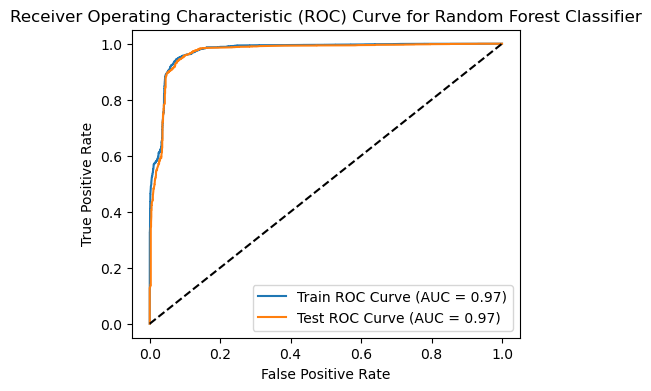

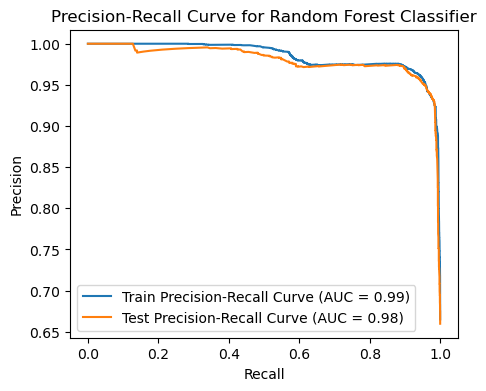

In [24]:
# Computation of the predicted probabilities for training and testing dataset using a trained Random Forest classifier
y_train_probs = RF_classifier.predict_proba(X_train_scaled)[:, 1]
y_test_probs = RF_classifier.predict_proba(X_test_scaled)[:, 1]

# Computation of ROC curve and AUC for training and testing dataset
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Computation of  Precision-Recall curve and AUC for training and testing dataset
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
pr_auc_train = auc(recall_train, precision_train)

precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)
pr_auc_test = auc(recall_test, precision_test)

# Plotting Precision-Recall curve
plt.figure(figsize=(5,4))
plt.plot(recall_train, precision_train, label='Train Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc_train))
plt.plot(recall_test, precision_test, label='Test Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc_test))
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


<b>Observation: </b> Random Forest is a reliable performer, with a high ROC AUC indicating effective class separation. It also achieves a good balance between precision and recall. However, because of its tiny AUC advantage, Gradient Boosting may be a superior option for jobs where precisely minimising false positives or totally maximising recall (capturing all positives) is crucial.

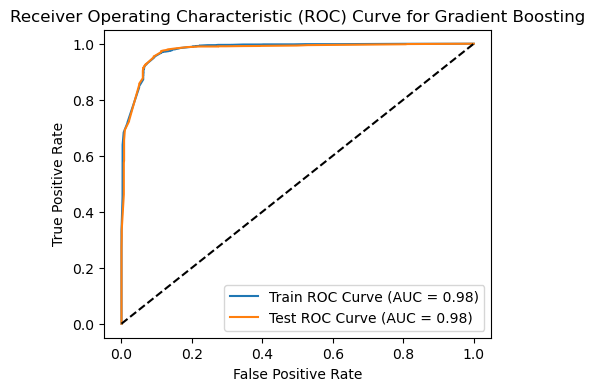

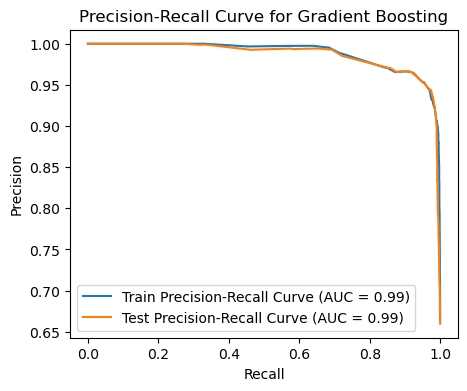

In [25]:
# Computation of the predicted probabilities for training and testing dataset using a trained Gradient Boosting classifier
y_train_probs_gbm = GBM_classifier.predict_proba(X_train)[:, 1]
y_test_probs_gbm = GBM_classifier.predict_proba(X_test)[:, 1]

# Computation of ROC curve and AUC for training and testing dataset
fpr_train_gbm, tpr_train_gbm, _ = roc_curve(y_train, y_train_probs_gbm)
roc_auc_train_gbm = auc(fpr_train_gbm, tpr_train_gbm)

fpr_test_gbm, tpr_test_gbm, _ = roc_curve(y_test, y_test_probs_gbm)
roc_auc_test_gbm = auc(fpr_test_gbm, tpr_test_gbm)

# Plotting ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr_train_gbm, tpr_train_gbm, label='Train ROC Curve (AUC = {:.2f})'.format(roc_auc_train_gbm))
plt.plot(fpr_test_gbm, tpr_test_gbm, label='Test ROC Curve (AUC = {:.2f})'.format(roc_auc_test_gbm))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Computation of  Precision-Recall curve and AUC for training and testing dataset
precision_train_gbm, recall_train_gbm, _ = precision_recall_curve(y_train, y_train_probs_gbm)
pr_auc_train_gbm = auc(recall_train_gbm, precision_train_gbm)

precision_test_gbm, recall_test_gbm, _ = precision_recall_curve(y_test, y_test_probs_gbm)
pr_auc_test_gbm = auc(recall_test_gbm, precision_test_gbm)

# Plotting Precision-Recall curve
plt.figure(figsize=(5,4))
plt.plot(recall_train_gbm, precision_train_gbm, label='Train Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc_train_gbm))
plt.plot(recall_test_gbm, precision_test_gbm, label='Test Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc_test_gbm))
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


<b>Observation: </b> Gradient Boosting excels at both differentiating positive and negative occurrences (high ROC AUC) and balancing precision and recall. Its versatility makes it a great fit for a variety of different classification tasks.

In [26]:
# F1-Score - Random forest
f1_score_train_rf = f1_score(y_train, y_train_pred)
f1_score_test_rf = f1_score(y_test, y_test_pred)

# F1-Score - Gradient Boosting
f1_score_train_gbm = f1_score(y_train, y_train_pred_GBM)
f1_score_test_gbm = f1_score(y_test, y_test_pred_GBM)

# Comparision Data
data = {
    'Metric': ['Training Accuracy', 'Testing Accuracy', 'Training F1-Score', 'Testing F1-Score', 'Time Complexity'],
    'Random Forest': [f"{train_accuracy*100:.2f}%", f"{test_accuracy*100:.2f}%", f"{f1_score_train_rf:.2f}", f"{f1_score_test_rf:.2f}", "O(n*log(n))"],
    'Gradient Boosting': [f"{train_accuracy_GBM*100:.2f}%", f"{test_accuracy_GBM*100:.2f}%", f"{f1_score_train_gbm:.2f}", f"{f1_score_test_gbm:.2f}", "O(n_estimators*n)"]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Metric,Random Forest,Gradient Boosting
0,Training Accuracy,93.85%,93.76%
1,Testing Accuracy,94.04%,94.19%
2,Training F1-Score,0.95,0.95
3,Testing F1-Score,0.96,0.96
4,Time Complexity,O(n*log(n)),O(n_estimators*n)


<h2 align="center"><b>CONCLUSION</b></h2>

The objective of this study was to predict water quality levels depending on a wide range of environmental constraints. The study proceeded by conducting exploratory data analysis (EDA) to better understand the dataset's structure, locate missing values, and examine connections between attributes. Spatial visualization techniques were used to show the spatial distribution of water quality levels. Handling missing values, transforming continuous target variables to categorical labels, and encoding categorical variables were among the data preprocessing tasks.

The trained Random Forest classifier and measured its performance using metrics including accuracy, confusion matrix, and classification reports. The model demonstrated excellent accuracy on both the training and testing datasets, showing that it is useful for predicting water quality levels. Further evaluation with K-fold cross-validation proved the model's generalizability. The study also compared the Random Forest classifier's performance to other alternative models, such as Gradient Boosting Machines (GBM), to evaluate which algorithm was best suited to the dataset. Following the analysis of the Gradient Boosting and Random Forest classifiers, it is clear that the former outperforms the one that followed marginally in terms of accuracy. However, this increased accuracy comes at the cost of a much longer execution time. While Gradient Boosting may be the preferred method for tasks where maximizing accuracy is critical and computational resources are large, Random Forest presents itself as a more efficient option for tasks that emphasize better model training and prediction without compromising performance. The Random Forest model and the GBM classifier performed similarly, indicating that both algorithms could be employed to predict water quality levels.

Finally, the study demonstrated the feasibility of employing machine learning algorithms for predicting water quality levels based on environmental factors. The proposed models can help to monitor and manage water resources, as well as contribute to environmental conservation and public health protection. Further research and enhancements to the models may improve their prediction accuracy and effectiveness in real-world circumstances.

<h2 align="left"><i><b>REFERENCES</b></i></h2>

[1] Kaggle, O. (2022). Water Quality Dataset. Retrieved from https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset/data

[2] University of Essex. (2024) Course title, [Online], Available at: https://moodle.essex.ac.uk/course/view.php?id=15076

[3] "Scikit-learn: Machine Learning in Python," Scikit-learn Developers, [Online]. Available: https://scikit-learn.org/stable/.

[4] Scikit-learn Developers. (n.d.) Random Forest Classifier, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

[5] "XGBoost Documentation," XGBoost Developers, [Online]. Available: https://xgboost.readthedocs.io/en/latest/.

[6] w3schools. (2023, January 1). Python Tutorial. Retrieved from https://www.w3schools.com/python/